# Proyek Analisis Data: Air Quality in Dongsi
- **Nama:** Diva Nisfu Mustika
- **Email:** m001d4kx2719@bangkit.academy
- **ID Dicoding:** m001d4kx2719

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : PT Diva Jaya sedang mempertimbangkan untuk meluncurkan produk baru yang bisa memabntu mengurangi tingginya polusi udara. Mereka ingin memahami pola kualitas udara dan distribusi polutan udara selama beberapa tahun terakhir untuk menentukan waktu yang tepat untuk peluncuran produk baru mereka. Kapan waktu yang tepat untuk peluncuran produk baru berdasarkan analisis tren polusi udara di setiap tahunnya?

- Pertanyaan 2 : Dalam menentukan waktu peluncuran juga dibutuhkan informasi mengenai tingkat NO2 di udara karena produk yang akan diluncurkan sangat berhubungan denghan itu. Sehingga dibutuhkan informasi Pada bulan apa saja kadar NO2 memiliki kadar tinggi di tahun 2015?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import numpy as np

## Data Wrangling

### Gathering Data

Data yang akan digunakan adalah data Air Quality untuk stasiun Dongsi

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/divanm/dashboard-dicoding/master/dashboard/main_data.csv", sep=',')

In [8]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


### Assessing Data

### *Memeriksa* tipe data dari tiap kolom

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Data set ini terdiri dari 17 kolom atau variabel yang mewakili berbagai informasi terkait kualitas udara dan cuaca. Berikut adalah interpretasi dari setiap variabel:

1. year: Tahun dari data pada baris ini.
2. month: Bulan dari data pada baris ini.
3. day: Hari dari data pada baris ini.
4. hour: Jam dari data pada baris ini.
5. PM2.5: Konsentrasi PM2.5 (partikulat matter dengan diameter kurang dari 2.5 mikrometer) dalam satuan mikrogram per meter kubik (ug/m^3).
6. PM10: Konsentrasi PM10 (partikulat matter dengan diameter kurang dari 10 mikrometer) dalam satuan mikrogram per meter kubik (ug/m^3).
7. SO2: Konsentrasi SO2 (dioksida sulfur) dalam satuan mikrogram per meter kubik (ug/m^3).
8. NO2: Konsentrasi NO2 (dioksida nitrogen) dalam satuan mikrogram per meter kubik (ug/m^3).
9. CO: Konsentrasi CO (karbon monoksida) dalam satuan mikrogram per meter kubik (ug/m^3).
10. O3: Konsentrasi O3 (ozon) dalam satuan mikrogram per meter kubik (ug/m^3).
11. TEMP: Temperatur udara dalam derajat Celsius.
12. PRES: Tekanan udara dalam hektopascal (hPa).
13. DEWP: Titik embun, yaitu suhu di mana uap air di udara mulai mengembun menjadi cairan, dalam derajat Celsius.
14. RAIN: Curah hujan dalam milimeter (mm).
15. wd: Arah angin.
16. WSPM: Kecepatan angin dalam meter per detik (m/s).
17. station: Nama situs pemantauan kualitas udara.

### Pengecekan duplikat data

In [10]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikat data sehingga tidak diperlukan penanganan

### Pengecekan Missing Value

In [ ]:
df.isna().sum()

terdapat missing value sehingga diperlukan penanganan

### Cleaning Data

### Handling missing value

Dari hasil pengecekan terlihat bahwa terdapat permasalahan missing value pada beberapa variabel sehingga dilakukan penanganan

1. Data numerik : Mengisi nilai konstan untuk data numerik yang terdapat missing value dengan fillna()

In [11]:
# Fill missing values with the mean of each column
df_filled = df.fillna(df.mean())
df_filled

C:\Users\Diva\AppData\Local\Temp\ipykernel_14092\3857799113.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.000000,17.000000,300.000000,89.000000,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.000000,16.000000,300.000000,88.000000,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,18.531107,17.000000,300.000000,60.000000,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.000000,18.000000,1330.069131,57.210637,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.000000,53.699443,200.000000,84.000000,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.000000,29.000000,400.000000,73.000000,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.000000,43.000000,500.000000,54.000000,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.000000,61.000000,700.000000,28.000000,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.000000,75.000000,900.000000,15.000000,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


In [12]:
df_filled.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WSPM        0
station     0
dtype: int64

2. Data kategorik : mengisi missing value dengan nilai yang sering muncul untuk data kategorik menggunakann fillna()

In [13]:
# Fill missing values with the mode of each column
df_filled['wd'].fillna(df_filled['wd'].mode()[0], inplace=True)

In [14]:
df_filled.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dari hasil penanganan terlihat bahwa semua missing value berhasil ditangani

## Exploratory Data Analysis (EDA)

## Explore Parameter Statistik

In [15]:
df_filled.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3939,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.67149,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.644198,97.442239,22.688062,33.174871,1135.697130,57.481150,11.45515,10.263131,13.806757,0.786058,NaN,1.280113,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.80000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,4.000000,28.000000,600.000000,13.000000,3.10000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,63.000000,88.000000,10.000000,49.000000,1100.000000,46.000000,14.60000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,117.000000,150.000000,24.000000,72.000000,1600.000000,80.000000,23.50000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>]], dtype=object)

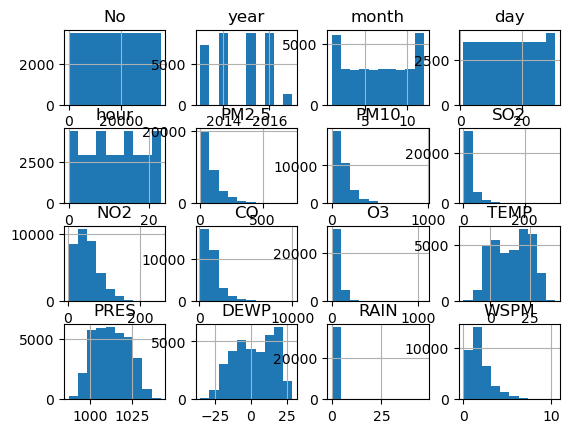

In [16]:
df_filled.hist()

In [17]:
df_filled.corr()

C:\Users\Diva\AppData\Local\Temp\ipykernel_14092\401203910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled.corr()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.003032,0.003703,-0.241270,-0.036219,0.006691,-0.093319,-0.119018,0.172835,-0.088817,0.008390,-0.003582
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.006831,0.004563,-0.191304,-0.061168,-0.010159,-0.063749,-0.148766,0.173583,-0.151710,0.004368,0.027649
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.015151,-0.005911,-0.186641,0.105107,0.068636,-0.112419,0.132503,-0.021161,0.265251,0.016542,-0.126871
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.002489,0.023555,-0.000100,-0.005808,-0.012311,-0.004654,0.015847,0.018163,0.020015,-0.006630,-0.009685
hour,0.000684,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,-0.001811,0.027577,-0.010605,-0.072861,-0.035569,0.283886,0.142074,-0.039070,-0.019904,0.005098,0.156576
PM2.5,-0.003032,-6.830761e-03,1.515112e-02,2.489494e-03,-1.811317e-03,1.000000,0.887073,0.543289,0.669870,0.766386,-0.136530,-0.137235,-0.005948,0.127810,-0.018986,-0.298772
PM10,0.003703,4.563120e-03,-5.910673e-03,2.355508e-02,2.757698e-02,0.887073,1.000000,0.490803,0.642986,0.692966,-0.126299,-0.132498,-0.016028,0.061771,-0.030949,-0.197368
SO2,-0.241270,-1.913045e-01,-1.866408e-01,-9.952747e-05,-1.060453e-02,0.543289,0.490803,1.000000,0.455444,0.555563,-0.155970,-0.334945,0.203253,-0.225489,-0.044805,-0.167501
NO2,-0.036219,-6.116768e-02,1.051075e-01,-5.807638e-03,-7.286124e-02,0.669870,0.642986,0.455444,1.000000,0.669621,-0.459624,-0.248547,0.086214,0.053297,-0.043095,-0.486550
CO,0.006691,-1.015892e-02,6.863605e-02,-1.231058e-02,-3.556921e-02,0.766386,0.692966,0.555563,0.669621,1.000000,-0.279010,-0.289216,0.125816,-0.002747,-0.012451,-0.330524


Membuat dataframe untuk melihat nilai NO2 perbulan pada setiap tahun

1. TAHUN 2013

In [41]:
def create_NO2_tabel(dataset, tahun):
    NO2_per_tahun = dataset[dataset['year'] == tahun]
    NO2_tabel = NO2_per_tahun[['NO2','month']].groupby(['month']).mean()
    return NO2_tabel

# Call the function with the `df_filled` dataset and the year 2013
NO2_tabel_2013 = create_NO2_tabel(df_filled, 2013)
NO2_tabel_2013.sort_values(by="NO2")

,NO2
month,
4,44.055773
8,45.085498
7,47.695626
5,52.171235
6,56.050290
11,59.895833
9,59.992778
12,61.905288
10,72.051893


2. TAHUN 2014

In [48]:
NO2_tabel_2014 = create_NO2_tabel(df_filled, 2014)
NO2_tabel_2014.sort_values(by="NO2")

,NO2
month,
7,43.294487
5,47.447803
6,47.468427
8,47.756719
12,50.865302
2,54.072265
4,55.747776
9,55.838611
1,60.610387


3. TAHUN 2015

In [49]:
NO2_tabel_2015 = create_NO2_tabel(df_filled, 2015)
NO2_tabel_2015.sort_values(by="NO2")

,NO2
month,
8,33.168275
7,37.900134
6,39.269854
5,39.874192
4,45.247078
9,48.251654
2,50.856395
3,51.937629
10,58.762361


4. TAHUN 2016

In [50]:
NO2_tabel_2016 = create_NO2_tabel(df_filled, 2016)
NO2_tabel_2016.sort_values(by="NO2")

,NO2
month,
2,34.124278
7,38.326002
8,39.822713
6,40.482725
5,42.034388
4,44.166788
1,49.813172
9,51.278726
3,56.955895


5. TAHUN 2017

In [51]:
NO2_tabel_2017 = create_NO2_tabel(df_filled, 2017)
NO2_tabel_2017.sort_values(by="NO2")

,NO2
month,
2,51.477516
1,63.764381


## Visualization & Explanatory Analysis

### Pertanyaan 1: PT Diva Jaya sedang mempertimbangkan untuk meluncurkan produk baru yang bisa memabntu mengurangi tingginya polusi udara. Mereka ingin memahami pola kualitas udara dan distribusi polutan udara selama beberapa tahun terakhir untuk menentukan waktu yang tepat untuk peluncuran produk baru mereka. Kapan waktu yang tepat untuk peluncuran produk baru berdasarkan analisis tren polusi udara di setiap tahunnya?

<ipython-input-66-0efe604859bc>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly_mean = df_filled.groupby([df_filled.index.year, df_filled.index.month]).mean()


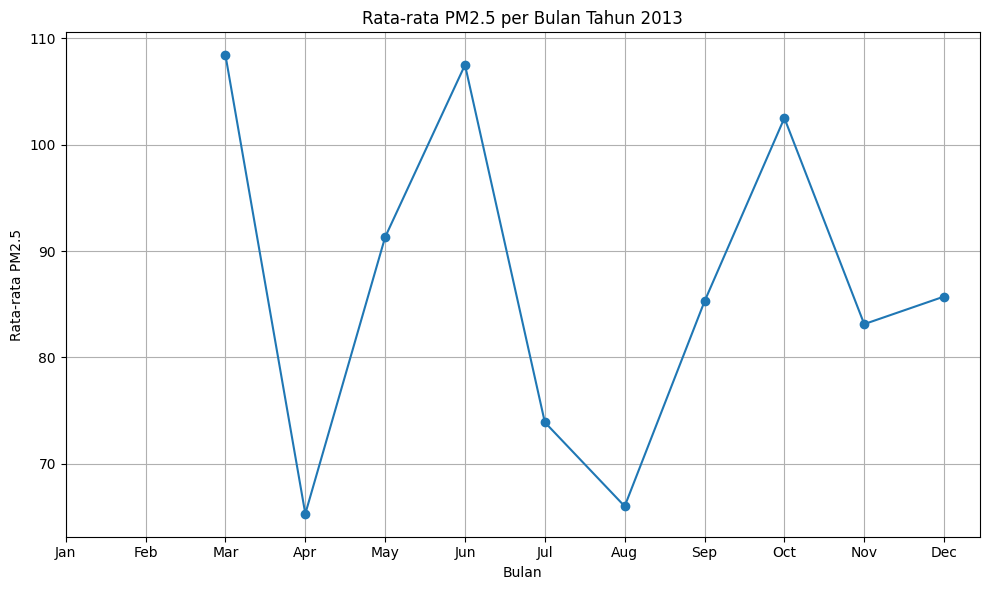

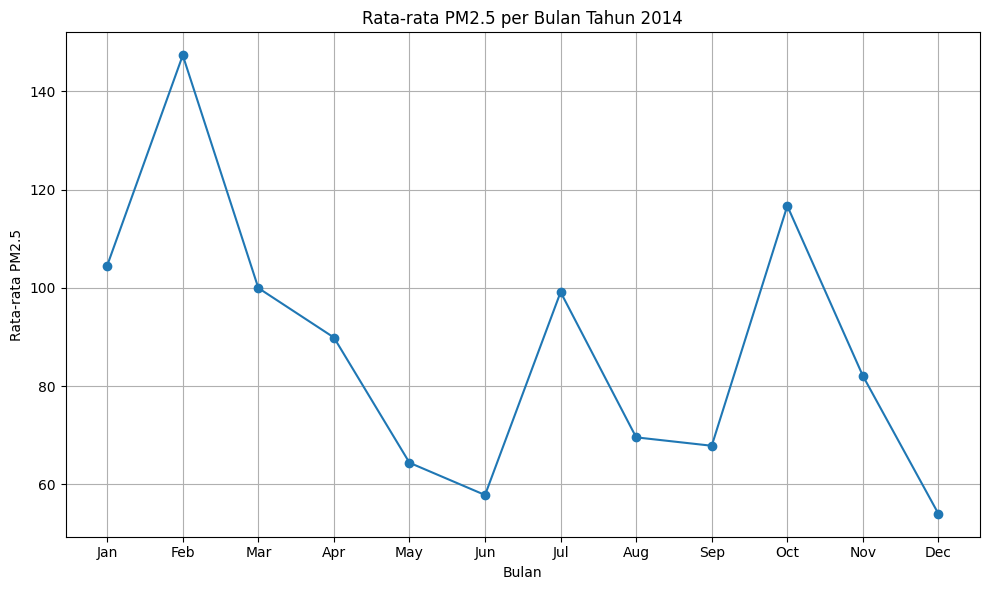

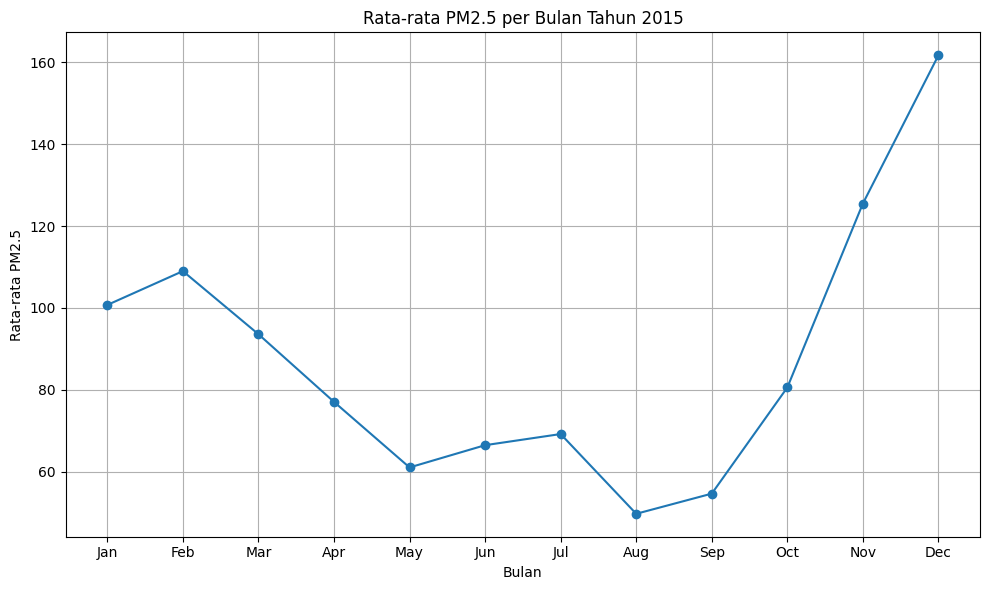

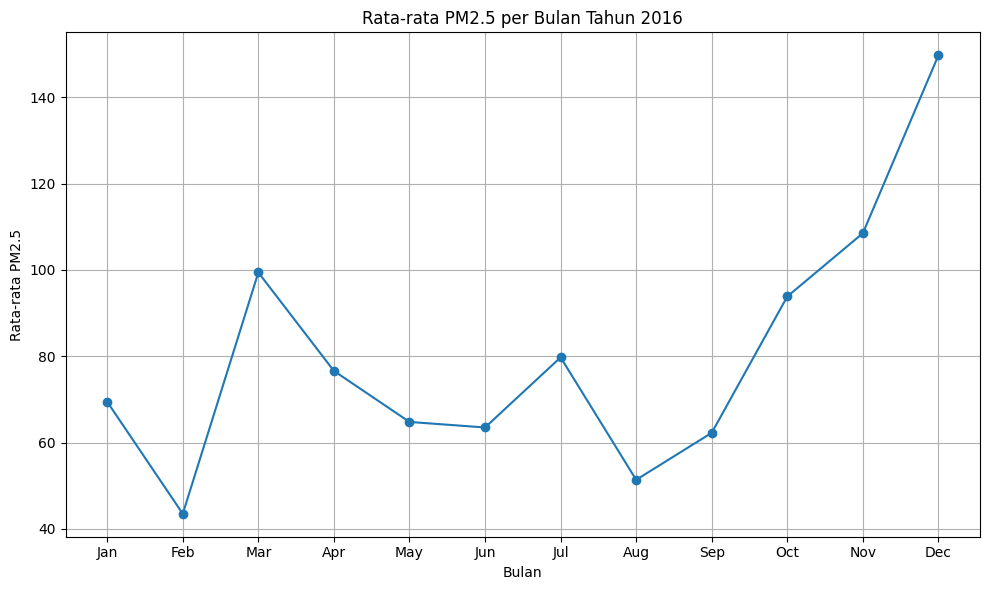

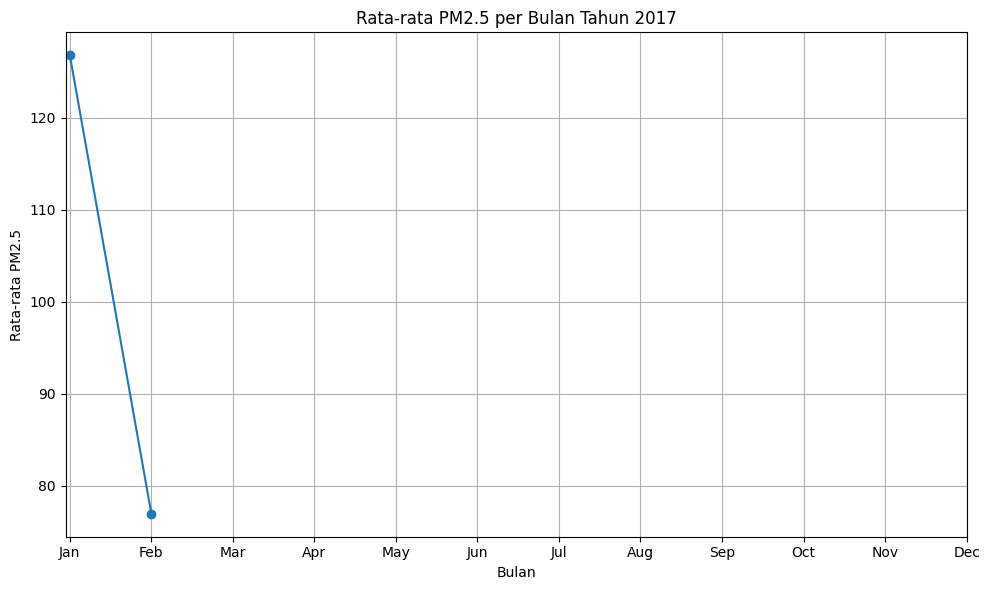

In [66]:
# Mengonversi kolom tanggal menjadi indeks datetime
df_filled['datetime'] = pd.to_datetime(df_filled[['year', 'month', 'day']])
df_filled.set_index('datetime', inplace=True)

# Menghitung rata-rata PM2.5 per bulan untuk setiap tahun
df_monthly_mean = df_filled.groupby([df_filled.index.year, df_filled.index.month]).mean()

# Membuat plot untuk setiap tahun
unique_years = df_filled.index.year.unique()

for year in unique_years:
    df_year = df_monthly_mean.loc[year]
    plt.figure(figsize=(10, 6))
    plt.plot(df_year.index.get_level_values(0), df_year['PM2.5'], marker='o', linestyle='-')
    plt.title(f'Rata-rata PM2.5 per Bulan Tahun {year}')
    plt.xlabel('Bulan')
    plt.ylabel('Rata-rata PM2.5')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Pertanyaan 2: Dalam menentukan waktu peluncuran juga dibutuhkan informasi mengenai tingkat NO2 di udara karena produk yang akan diluncurkan sangat berhubungan denghan itu. Sehingga dibutuhkan informasi Pada bulan apa saja kadar NO2 memiliki kadar tinggi di tahun 2015?

(0.0, 13.0)

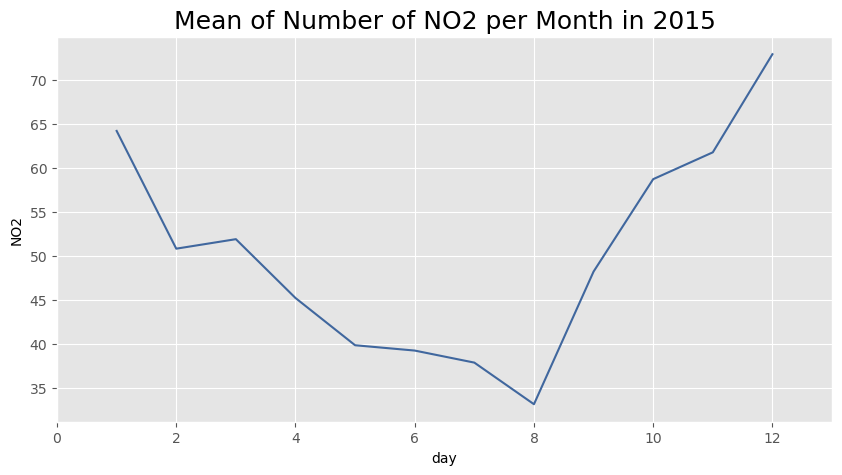

In [52]:
plt.figure(figsize=(10,5))
plt.plot(NO2_tabel_2015, color = "#40679E")
plt.title("Mean of Number of NO2 per Month in 2015", loc = 'center', fontsize = 18)
plt.xlabel("day")
plt.ylabel("NO2")
plt.style.use('ggplot')
plt.xlim(0,13)

## Conclusion

### Conclution pertanyaan 1

Dari plot di atas, dapat diamati bahwa tren PM2.5 berbeda-beda setiap bulan di tiap tahunnya. Pada tahun 2015, cenderung memiliki tren yang fluktuatif sehingga waktu ini tidak disarankan untuk meluncurkan produk. Sedangkan pada tahun 2015 dan 2016 terdapat tren naik di akhir tahun sehingga kedua tahun ini bisa dijadikan waktu yang tepat untuk meluncurkan produk tersebut. Terakhir, pada tahun 2017 cenderung memiliki tren penurunan sehingga tidak disarankan pula untuk meluncurkan produk pada tahun ini

###Conclution pertanyaan 2

Pada tahun 2015 dan 2016 sebelumnya telah direkomendasikan untuk meluncurkan produk pada tahun ini. Akan tetapi, perusahaan hanya bisa meluncurkan produk di satu tahun saja. Terlihat bahwa tahun 2015 memiliki kadar NO2 lebih tinggi daripada tahun 2016 sehingga 2015 lebih disarankan daripada 2016. Pada tahun 2015 memiliki kadar NO2 yang semakin tinggi menjelang akhir tahun. Oleh karena itu, peluncuran produk disarankan pada pertengahan tahun hingga akhir tahun 2015.